Machine learning-Linear Regression

The basics of prediction with linear models
'closed form,gradient descent & sklearn'
working through all the methods to conduct OLS optimization for linear regression

In [ ]:
!pip install yfinance

In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf

let's use some finance data collected from the Yahoo! finance API using yfinance.For the linear regression example.We will compare Microsoft monthly returns(MSFT) vs the market (SPY or S&P 500)

In [6]:
start_date = datetime(2010,1,1)
end_date = datetime(2021,12,31)
stock_data=yf.download('SPY MSFT',
                       interval="1mo",
                       start=start_date,
                       end=end_date)
stock_data.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                   High  \
                 MSFT        SPY       MSFT         SPY       MSFT   
Date                                                                 
2010-01-01  21.509579  83.499336  28.180000  107.389999  31.240000   
2010-02-01  21.883593  86.104095  28.670000  110.739998  29.030001   
2010-03-01  22.461384  90.971458  29.290001  117.000000  30.570000   
2010-04-01  23.419962  92.759178  30.540001  118.809998  31.580000   
2010-05-01  19.785032  85.389046  25.799999  109.370003  31.059999   

                              Low                   Open              \
                   SPY       MSFT         SPY       MSFT         SPY   
Date                                                                   
2010-01-01  115.139999  27.660000  107.220001  30.620001  112.370003   
2010-02-01  111.580002  27.570000  104.580002  28.389999  108.150002   
2010-03-01  118.169998  28.240000  111.169998  28.770000  111.199997   
2010-04-01  122.120003  28.620001  117.099998  29.350000  117.800003   
2010-05-01  120.680000  24.559999  104.379997  30.670000  119.379997   

                Volume              
                  MSFT         SPY  
Date                                
2010-01-01  1359650900  3706842300  
2010-02-01  1074643300  4451912400  
2010-03-01  1110237200  3899688500  
2010-04-01  1319029500  3887089700  
2010-05-01  1720130200  7413878800

In [7]:
stock_data.columns

MultiIndex([('Adj Close', 'MSFT'),
            ('Adj Close',  'SPY'),
            (    'Close', 'MSFT'),
            (    'Close',  'SPY'),
            (     'High', 'MSFT'),
            (     'High',  'SPY'),
            (      'Low', 'MSFT'),
            (      'Low',  'SPY'),
            (     'Open', 'MSFT'),
            (     'Open',  'SPY'),
            (   'Volume', 'MSFT'),
            (   'Volume',  'SPY')],
           )

In [8]:
stock_data_adj_close = stock_data.iloc[:,stock_data.columns.get_level_values(0)=='Adj Close'].pct_change().dropna()
stock_data_adj_close.columns=['MSFT','SPY']
stock_data_adj_close.head()

,MSFT,SPY
Date,,
2010-02-01,0.017388,0.031195
2010-03-01,0.026403,0.056529
2010-04-01,0.042677,0.019651
2010-05-01,-0.155206,-0.079454
2010-06-01,-0.104115,-0.056231


In [9]:
from seaborn import scatterplot

<Axes: xlabel='MSFT', ylabel='SPY'>

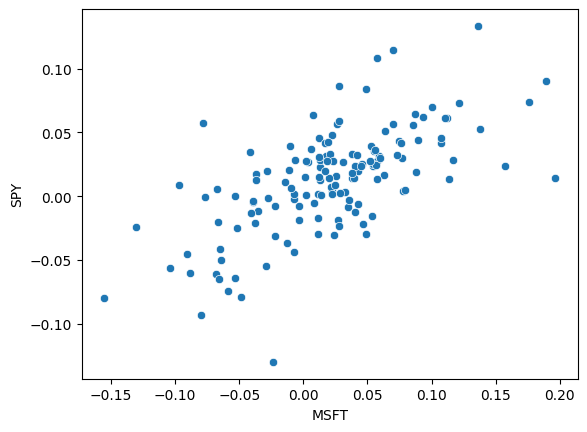

In [10]:
scatterplot(data=stock_data_adj_close,x='MSFT',y='SPY')

Let's look at creating our linear regression model using closed from OLS model

In [11]:
x = stock_data_adj_close.SPY.values
ones = np.ones(len(x))
x = np.vstack((ones,x))
x=x.T
y=stock_data_adj_close.MSFT.values


In [12]:
#closed form calculation
betas=np.linalg.inv(x.T @ x) @ x.T @ y
print(betas)

[0.00867072 0.96867953]


Now lets do the same thing but with gradient descent

In [13]:
x=x[:,1] #remove the ones column for this part

In [14]:
# initialize the parameteres to 0(not exact 0)
b_1=0.01
b_0=0.01
alpha=0.1 # the learning rate
epochs=70000 # The no. of descent iteration

n=float(len(x)) # no. of elements in x
# Gradient descent 
for i in range(epochs):
    y_pred = b_1*x+b_0 # the current predicted value of y
    D_b_1 = (-2/n)*sum(x*(y-y_pred)) # derivative wrt b_1
    D_b_0 = (-2/n)*sum(y-y_pred) # derivative wrt b_0
    b_1=b_1-alpha*D_b_1 #update b_1
    b_0=b_0-alpha*D_b_0 #update b_0
print(b_0,b_1)

0.008670717225811394 0.9686795261696352


Now lets see how it is done using sklearn

In [15]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [16]:
# keep in mind we have to split this data .however this data is timeseries so we can only test it to predict forward
regr=LinearRegression()
x=x.reshape(-1,1) #shape needed for sklearn
regr.fit(x,y)
print(regr.score(x,y)) #gives r^2

0.4151036176666262


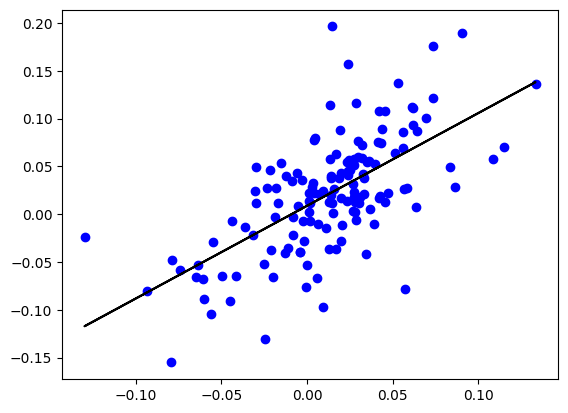

In [17]:
plt.scatter(x,y,color='b')
plt.plot(x,regr.predict(x),color='k')
plt.show()

In [18]:
# predict going forward
start_date = datetime(2022,1,1)
end_date = datetime(2022,12,31)
stock_data=yf.download('SPY MSFT',
                       interval="1mo",
                       start=start_date,
                       end=end_date)
stock_data_adj_close = stock_data.iloc[:,stock_data.columns.get_level_values(0)=='Adj Close'].pct_change().dropna()
stock_data_adj_close.columns=['MSFT','SPY']
x = stock_data_adj_close.SPY.values
x=x.reshape(-1,1)
y=stock_data_adj_close.MSFT.values

[*********************100%***********************]  2 of 2 completed


In [19]:
from sklearn.metrics import r2_score
r2_score(y,regr.predict(x))

0.6960137672222133

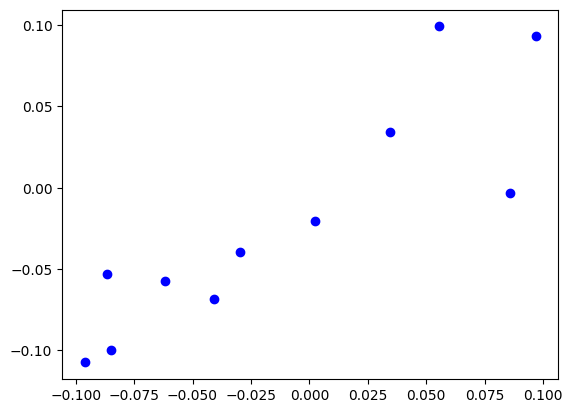

In [20]:
plt.scatter(x,y,color='b')
plt.show()